# SVD MPS Decomposition

In [ ]:
import numpy as np

In [ ]:
from sympy import Matrix, init_printing
init_printing()

In [ ]:
import sys
sys.path.append('../tensornetworks/')
import tensornetworks as tn

In [ ]:
import logging
logging.basicConfig(
    format='%(asctime)s-%(levelname)s: %(message)s',
    datefmt='%m/%d/%Y %I:%M:%S %p',
    level=logging.INFO,
    #level=logging.DEBUG,
)

tensor_dim = [2, 3, 2, 3, 4] # local space dimensions
T = np.random.random(tuple(tensor_dim)) # rank-5 tensor
T = T / np.linalg.norm(T)

**BE AWARE**
El ordenamiento en numpy se hace siguiendo el estilo C mientras que en Matlab se sigue la ordenación Fortran. Así que para reproducir el codigo Matlab hay que explicitarlo!!

In [ ]:
# Reproduce codigo Matlab
tensor_dim = [2, 3, 2, 3, 4] # local space dimensions
T = np.array([i for i in range(1, np.prod(tensor_dim)+1)])
T = T.reshape(tensor_dim, order='F')
T = T / np.linalg.norm(T)

In [ ]:
mps_svd, d_alphas_svd, sizes_svd, entropy_svd= tn.mps_svd_lr_decompose(T)

In [ ]:
mps_qr, d_alphas_qr, size_qr= tn.mps_qr_lr_decompose(T)

In [ ]:
recomp_svd_T = tn.compose_mps(mps_svd)
np.isclose(T, recomp_svd_T.reshape(T.shape)).all()

In [ ]:
recomp_qr_T = tn.compose_mps(mps_qr)
np.isclose(T, recomp_qr_T.reshape(T.shape)).all()

In [ ]:
d_alphas_svd

In [ ]:
d_alphas_qr

In [ ]:
[i.shape for i in mps_svd]

In [ ]:
[i.shape for i in mps_qr]

In [ ]:
size_qr

In [ ]:
sizes_svd

In [ ]:
4 + 36 + 144*2 +16

In [ ]:
entropy_svd

In [ ]:
eps = np.finfo(float).eps

## 2. Entanglement Entropy

Para calcular la entropía de entrelazamiento (**entanglement entropy**) descomponemos la matriz usando SVD:

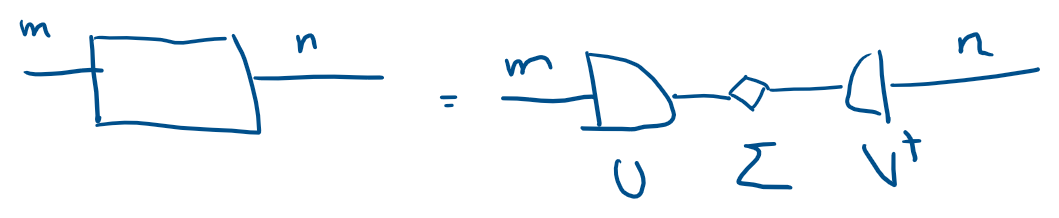



$$S(\Sigma) = - \sum_i |\lambda_i| ^2 \log_2|\lambda_i|^2 $$


Donde: 
$$\Sigma_{i,j} = \lambda_i \delta_{ij}$$

Así pues debemos primero generar la matriza y después hacer la svd.

In [ ]:
def entanglement_entropy(m_):
    s_ = np.linalg.svd(m_, full_matrices=False, compute_uv=False)
    return - s_**2 @ np.log2(s_**2)

### 2.1 A = {1,2}. B = {3, 4, 5}

In [ ]:
import copy

In [ ]:
M = copy.deepcopy(T)
M = M.reshape(np.prod(M.shape[:2]), np.prod(M.shape[2:]))
entanglement_entropy(M)

### 2.2 A = {1,3}, B={2,4,5}

In [ ]:
M = copy.deepcopy(T)
M = M.transpose((0, 2, 1, 3, 4))
M.shape
M = M.reshape(np.prod(M.shape[:2]), np.prod(M.shape[2:])) 
entanglement_entropy(M)

### 2.3 A = {1,5}, B={2,3,4}

In [ ]:
M = copy.deepcopy(T)
M = M.transpose((0, 4, 1, 2, 3))
M.shape
M = M.reshape(np.prod(M.shape[:2]), np.prod(M.shape[2:])) 
entanglement_entropy(M)